# Image similarity search

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input

Using TensorFlow backend.


In [3]:
batch_size=2100
img_size = 299
train_path = '../data/sports/train/'
test_path = '../data/sports/test/'

In [4]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
bottleneck_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False)

Found 2100 images belonging to 3 classes.


In [5]:
images, labels  = bottleneck_generator.next()

In [6]:
images.shape

(2100, 299, 299, 3)

In [7]:
base_model = Xception(include_top=False,
                      weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      pooling='avg')

In [8]:
bottlenecks = base_model.predict(images, verbose=2)

In [9]:
bottlenecks.shape

(2100, 2048)

In [23]:
bottlenecks[0]

array([0.0382571 , 0.1800974 , 0.00130742, ..., 0.0578015 , 0.        ,
       0.01162386], dtype=float32)

In [24]:
from sklearn.neighbors import DistanceMetric

In [25]:
dist = DistanceMetric.get_metric('euclidean')

In [12]:
def imshow_scaled(img):
    plt.imshow((img + 1) / 2)

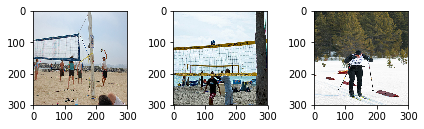

In [13]:
plt.subplot(1, 3, 1)
imshow_scaled(images[0])

plt.subplot(1, 3, 2)
imshow_scaled(images[1])

plt.subplot(1, 3, 3)
imshow_scaled(images[900])

plt.tight_layout()

In [14]:
bn_dist = dist.pairwise(bottlenecks)

In [15]:
bn_dist.shape

(2100, 2100)

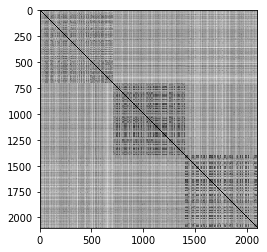

In [16]:
plt.imshow(bn_dist, cmap='gray')

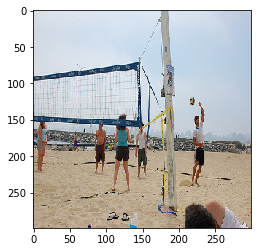

In [17]:
imshow_scaled(images[0])

In [27]:
dist_from_sel = pd.Series(bn_dist[0])

what are the closest images and their indices?

In [ ]:
dist_from_sel.sort_values().head(9)

can also do for most dis-similar images:

In [26]:
dist_from_sel.sort_values().tail(9)

665     14.101070
100     14.215482
1586    14.251244
1552    14.262374
325     14.279165
568     14.428145
1381    14.478794
838     14.495974
613     14.712922
dtype: float64

In [20]:
n_rows = 3
n_cols = 3
n_images = n_rows * n_cols

In [21]:
retrieved = dist_from_sel.sort_values().head(n_images)

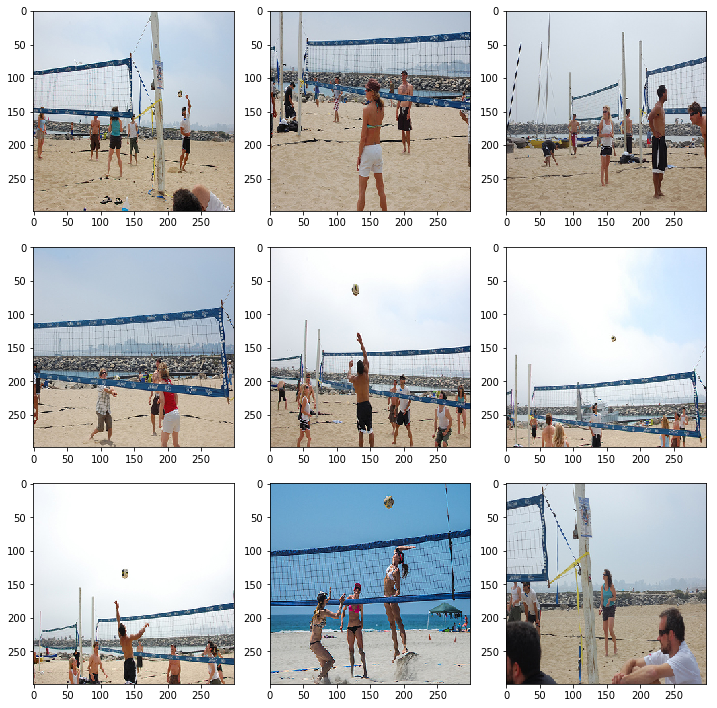

In [22]:
plt.figure(figsize=(10, 10))
i = 1
for idx in retrieved.index:
    plt.subplot(n_rows, n_cols, i)
    imshow_scaled(images[idx])
    i += 1
plt.tight_layout()

## Exercise

Define a function `image_search` that encapsulates the code above and retrieves and plot the top 8 images closest to a given image index:

```python
def image_search(img_index, n_rows=3, n_columns=3):
    ....your code here...
```

In [28]:
def image_search(img_index, n_rows, n_cols):
    
    dist_from_sel = pd.Series(bn_dist[img_index])
    dist_from_sel.sort_values().head(9)
    
    plt.figure(figsize=(10, 10))
    i = 1
    for idx in retrieved.index:
        plt.subplot(n_rows, n_cols, i)
        imshow_scaled(images[idx])
        i += 1
    plt.tight_layout()
    
    

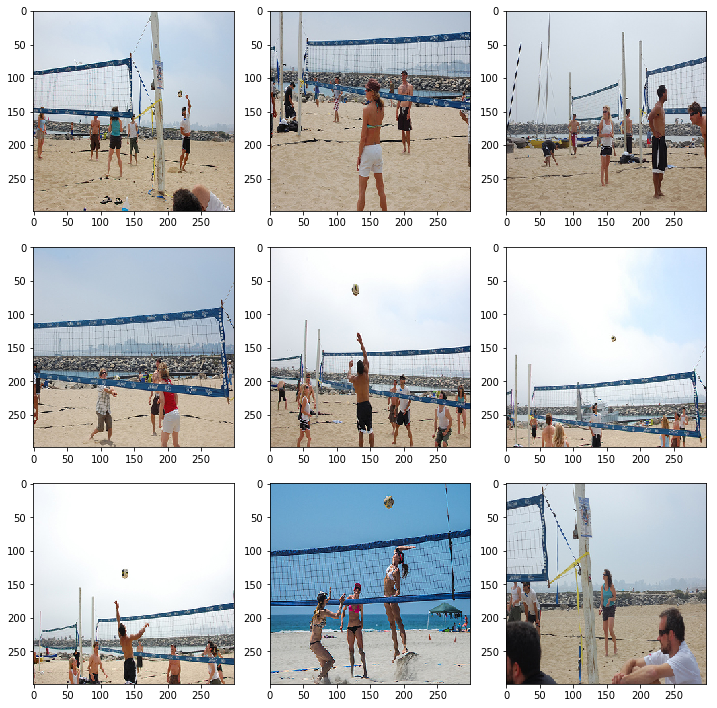

In [30]:
image_search(1000,3,3)